This notebook is used for exploring the combined dataset

#Findings

A lot of the same mext measurements (location/time) were used multiple times as the "closest" measurement in space and time.

For a given mext location, most of the closest safecast measurements are either all above or below the dose rate measured by mext. This could have a few explanations:
* certain geographic features that are different between the route that safecast took and the fixed location used by mext
    * shielding by buildings/mountains
    * different soil makeup (radon,uranium natural radioactivity)

We have probably ruled out a lot of time dependent weather effects by only choosing measurement pairs that were within 1 hour of each other

1976 measurement pairs within 500m and 1 hour, at 7 different mext locations
164 measurement pairs within 200m and 1 hour at 4 different mext locations
45 measurement pairs within 100m and 1 hour at 2 different mext locations

Of all the safecast measurements within the mext time frame, 3613 of 2117836 measurements had doserates over 11.41 uSv/hr, the average rate at which an increase in the probability of cancer has been observed, if that rate remained the entire year. All of these were associated with the same mext location

Only two of the mext locations (mloc_id 23 and 25) have multiple safecasts measurements within 500m and 1 hr at multiple times. We'll use these for time series analysis

In [1]:
import pandas as pd

In [113]:
# df = pd.read_csv('safecast_dists.csv')

df = pd.read_csv('safecast3.csv')

In [98]:
len(df.index)

2117836

In [ ]:
# #add distance between measurements since it somehow did not make it yet
# from math import cos, sqrt, sin, radians, atan2
# def haversine_distance(lat1,lng1,lat2,lng2):
#     R = 6731.0 #radius of Earth in km
#     dlon = lng2 - lng1
#     dlat = lat2 - lat1
#     a = (sin(dlat/2))**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2 
#     c = 2 * atan2(sqrt(a), sqrt(1-a)) 
#     return 6731.0 * c

# df['distdiff'] = df.apply(lambda row: haversine_distance(*map(radians,row[['lat','long','mlat','mlong']])),axis=1)

{'boxes': [<matplotlib.lines.Line2D at 0x7f9cc3f159b0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9cc3f067f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9cc3eff898>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9cc3eff2e8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9cc3f15c50>,
  <matplotlib.lines.Line2D at 0x7f9cc3f06240>]}

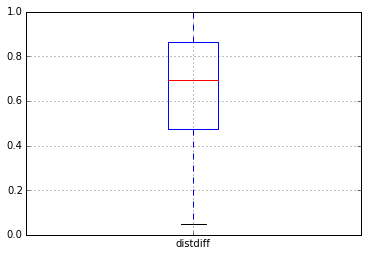

In [110]:
df[df.distdiff < 1].boxplot('distdiff')

In [114]:
df.columns

Index(['User ID', 'lat', 'long', 'Device ID', 'doserate', 'datetime',
       'distance', 'mlat', 'mlong', 'mloc_id', 'mtime', 'timediff', 'mdr',
       'drdiff'],
      dtype='object')

In [115]:
df = df[['lat','long','datetime','doserate','mlat','mlong','mloc_id','mtime','mdr','distance','timediff','drdiff']]

In [122]:
df.to_csv('safecast4.csv',index=False, float_format='%.6f')

In [120]:
df.dtypes

lat         float64
long        float64
datetime     object
doserate    float64
mlat        float64
mlong       float64
mloc_id       int64
mtime        object
mdr         float64
distance    float64
timediff    float64
drdiff      float64
dtype: object

,lat,long,datetime,doserate,mlat,mlong,mloc_id,mtime,mdr,distance,timediff,drdiff
0,35.640968,139.720698,2011-04-24 01:53:03,0.134286,35.706461,139.697927,25,2011-04-24 02:00:00,0.071,7.99497,417,-0.06329
1,35.640967,139.720698,2011-04-24 01:53:08,0.140000,35.706461,139.697927,25,2011-04-24 02:00:00,0.071,7.99516,412,-0.06900
2,35.640965,139.720700,2011-04-24 01:53:13,0.140000,35.706461,139.697927,25,2011-04-24 02:00:00,0.071,7.99539,407,-0.06900
3,35.641018,139.720760,2011-04-24 01:53:28,0.134286,35.706461,139.697927,25,2011-04-24 02:00:00,0.071,7.99092,392,-0.06329
4,35.641073,139.720798,2011-04-24 01:53:33,0.131429,35.706461,139.697927,25,2011-04-24 02:00:00,0.071,7.98570,387,-0.06043
5,35.641118,139.720842,2011-04-24 01:53:38,0.120000,35.706461,139.697927,25,2011-04-24 02:00:00,0.071,7.98175,382,-0.04900
6,35.641195,139.720930,2011-04-24 01:53:43,0.111429,35.706461,139.697927,25,2011-04-24 02:00:00,0.071,7.97540,377,-0.04043
7,35.641350,139.721053,2011-04-24 01:53:48,0.122857,35.706461,139.697927,25,2011-04-24 02:00:00,0.071,7.96115,372,-0.05186
8,35.641403,139.721172,2011-04-24 01:53:53,0.125714,35.706461,139.697927,25,2011-04-24 02:00:00,0.071,7.95827,367,-0.05471
9,35.641350,139.721448,2011-04-24 01:53:58,0.117143,35.706461,139.697927,25,2011-04-24 02:00:00,0.071,7.97168,362,-0.04614


In [77]:
df.mloc_id.value_counts()

23    728211
25    461849
11    211780
5     111854
13     98597
3      83189
45     79953
20     66373
9      62110
16     33242
32     32295
44     20430
27     20245
26     16948
4      16222
31     15818
2      15694
30     12578
41      9789
35      8673
14      4475
43      2728
42      1975
21      1443
37       942
39       261
15        80
12        52
0         30
dtype: int64

In [78]:
for i,g in df.groupby('mloc_id'):
    print(i)
    print(g.mtime.value_counts())

0
2011-09-23 16:00:00    30
dtype: int64
2
2011-06-18 13:00:00    1675
2011-10-20 17:00:00    1426
2011-10-20 18:00:00     992
2011-10-10 09:00:00     719
2011-08-26 10:00:00     718
2011-08-26 11:00:00     716
2011-08-27 05:00:00     716
2011-10-10 08:00:00     715
2011-10-11 10:00:00     713
2011-06-18 14:00:00     685
2011-10-11 11:00:00     638
2011-10-11 06:00:00     627
2011-10-10 07:00:00     612
2011-10-11 09:00:00     588
2011-08-25 10:00:00     579
2011-10-20 16:00:00     496
2011-08-26 12:00:00     434
2011-08-27 06:00:00     433
2011-08-26 09:00:00     412
2011-10-11 07:00:00     379
2011-10-10 10:00:00     369
2011-08-25 09:00:00     345
2011-08-27 10:00:00     328
2011-08-26 06:00:00     164
2011-08-27 07:00:00     101
2011-08-27 04:00:00      81
2011-08-27 09:00:00      33
dtype: int64
3
2011-09-22 18:00:00    2042
2011-09-22 19:00:00    1574
2011-08-07 05:00:00    1450
2011-11-24 17:00:00    1444
2011-09-29 16:00:00    1442
2011-09-29 06:00:00    1442
2011-12-28 12:00:0

In [ ]:
df[df.]

In [79]:
df[['doserate','mdr']].describe()

,doserate,mdr
count,2117836.000000,2117836.000000
mean,0.316561,0.410202
std,0.962960,0.501647
min,0.028571,0.020000
25%,0.111429,0.052000
50%,0.145714,0.058000
75%,0.240000,0.981000
max,46.388571,1.700000


In [81]:
df.sort('doserate',ascending=False).head()

,User ID,lat,long,Device ID,doserate,datetime,distance,mlat,mlong,mloc_id,mtime,timediff,mdr,drdiff
1673297,1,37.409705,141.027167,NaN,46.388571,2011-12-15 09:16:40,65.56118,37.750361,140.469389,23,2011-12-15 09:00:00,1000,0.966,-45.42257
1673296,1,37.409702,141.027155,NaN,46.057143,2011-12-15 09:16:35,65.56056,37.750361,140.469389,23,2011-12-15 09:00:00,995,0.966,-45.09114
1673298,1,37.409690,141.027317,NaN,45.745714,2011-12-15 09:16:45,65.57332,37.750361,140.469389,23,2011-12-15 09:00:00,1005,0.966,-44.77971
1673295,1,37.409712,141.027140,NaN,45.580000,2011-12-15 09:16:30,65.55873,37.750361,140.469389,23,2011-12-15 09:00:00,990,0.966,-44.61400
1673294,1,37.409732,141.027125,NaN,44.931429,2011-12-15 09:16:25,65.55619,37.750361,140.469389,23,2011-12-15 09:00:00,985,0.966,-43.96543


In [97]:
df[df.doserate > 11.41].describe()

,User ID,lat,long,Device ID,doserate,distance,mlat,mlong,mloc_id,timediff,mdr,drdiff
count,3613,3613.000000,3613.000000,0,3613.000000,3613.000000,3.613000e+03,3613.000000,3613,3613.000000,3613.000000,3613.000000
mean,1,37.469823,140.928082,NaN,17.946844,54.088835,3.775036e+01,140.469389,23,808.820924,0.990982,-16.955863
std,0,0.051672,0.082220,NaN,5.168395,8.861618,8.795020e-07,0.000004,0,499.729320,0.051768,5.183150
min,1,37.380753,140.361010,NaN,11.411429,31.596000,3.775036e+01,140.469389,23,0.000000,0.930000,-45.422570
25%,1,37.428692,140.933138,NaN,14.154286,54.238420,3.775036e+01,140.469389,23,385.000000,0.967000,-18.824430
50%,1,37.470547,140.933167,NaN,16.528571,54.242180,3.775036e+01,140.469389,23,756.000000,0.978000,-15.564860
75%,1,37.470720,140.976860,NaN,19.811429,61.029770,3.775036e+01,140.469389,23,1221.000000,0.997000,-13.150140
max,1,37.603373,141.028012,NaN,46.388571,66.320140,3.775036e+01,140.469389,23,1800.000000,1.200000,-10.214290


In [124]:
a = df[(df.distance < 0.5) & (df.timediff < 3600)]
# a.mloc_id.value_counts()
a.describe()

,lat,long,doserate,mlat,mlong,mloc_id,mdr,distance,timediff,drdiff
count,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000
mean,36.798841,139.901987,0.378417,36.798354,139.902002,23.717611,0.566474,0.348694,873.088563,0.188057
std,1.266561,0.916342,0.325345,1.267262,0.916190,4.073404,0.568014,0.104323,534.177070,0.327872
min,34.676463,135.533722,0.051429,34.680000,135.535278,9.000000,0.037000,0.049260,0.000000,-0.290000
25%,35.706520,139.694649,0.111429,35.706461,139.697927,23.000000,0.053000,0.275620,402.000000,-0.069290
50%,37.748029,140.464683,0.160000,37.750361,140.469389,23.000000,0.059000,0.356565,827.000000,-0.035640
75%,37.752052,140.470564,0.597143,37.750361,140.469389,25.000000,1.010000,0.444213,1308.500000,0.501710
max,39.718050,140.908765,1.300000,39.719444,140.905605,35.000000,1.700000,0.499470,1800.000000,1.117140


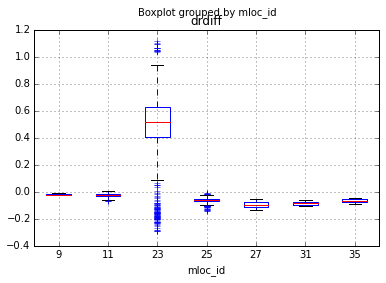

In [65]:
%matplotlib inline
a.boxplot('drdiff' ,by='mloc_id')

In [129]:
#seems like only mloc_id = 23 and 25 have good data to look at how things change in timeseries
for i,g in a.groupby(['mloc_id']):
    print(i)
    print(g[['drdiff','timediff','distance']].describe())
    print(g.mtime.value_counts())
    
# b = a[(a.mloc_id == 23) | (a.mloc_id == 25) ]

9
         drdiff    timediff  distance
count  6.000000    6.000000  6.000000
mean  -0.019475  762.500000  0.257782
std    0.006920    9.354143  0.109228
min   -0.026140  750.000000  0.138550
25%   -0.025427  756.250000  0.167208
50%   -0.020430  762.500000  0.250470
75%   -0.015425  768.750000  0.339718
max   -0.009000  775.000000  0.398280
2011-06-05 19:00:00    6
dtype: int64
11
           drdiff    timediff    distance
count  124.000000  124.000000  124.000000
mean    -0.022567  196.217742    0.286401
std      0.016957  139.073038    0.037166
min     -0.069570    1.000000    0.233460
25%     -0.032430   77.250000    0.276672
50%     -0.021000  163.500000    0.277750
75%     -0.012430  314.250000    0.279658
max      0.007570  466.000000    0.495190
2011-09-18 09:00:00    124
dtype: int64
23
           drdiff     timediff    distance
count  922.000000   922.000000  922.000000
mean     0.477495  1153.847072    0.347877
std      0.268944   447.073150    0.099787
min     -0.290000   17

In [133]:
a.to_csv('combined_500m_1hr.csv', index=False)

In [84]:
df[df.distance <0.5 ].describe()

,User ID,lat,long,Device ID,doserate,distance,mlat,mlong,mloc_id,timediff,mdr,drdiff
count,1976,1976.000000,1976.000000,0,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000
mean,1,36.798841,139.901987,NaN,0.378417,0.348694,36.798354,139.902002,23.717611,873.088563,0.566474,0.188057
std,0,1.266561,0.916342,NaN,0.325345,0.104323,1.267262,0.916190,4.073404,534.177070,0.568014,0.327872
min,1,34.676463,135.533722,NaN,0.051429,0.049260,34.680000,135.535278,9.000000,0.000000,0.037000,-0.290000
25%,1,35.706520,139.694649,NaN,0.111429,0.275620,35.706461,139.697927,23.000000,402.000000,0.053000,-0.069290
50%,1,37.748029,140.464683,NaN,0.160000,0.356565,37.750361,140.469389,23.000000,827.000000,0.059000,-0.035640
75%,1,37.752052,140.470564,NaN,0.597143,0.444213,37.750361,140.469389,25.000000,1308.500000,1.010000,0.501710
max,1,39.718050,140.908765,NaN,1.300000,0.499470,39.719444,140.905605,35.000000,1800.000000,1.700000,1.117140


In [53]:
a.describe()

,User ID,lat,long,Device ID,doserate,distance,mlat,mlong,mloc_id,timediff,mdr,drdiff
count,7044.000000,7044.000000,7044.000000,0,7044.000000,7044.000000,7044.000000,7044.000000,7044.000000,7044.000000,7044.000000,7044.000000
mean,1.007950,36.617467,139.804502,NaN,0.347245,0.657683,36.618133,139.805473,24.024418,903.875923,0.536468,0.189224
std,0.125853,1.233495,0.892521,NaN,0.293105,0.235674,1.233438,0.894184,3.806923,495.941311,0.546819,0.327573
min,1.000000,34.672127,135.532558,NaN,0.048571,0.049260,34.680000,135.535278,3.000000,0.000000,0.037000,-0.290000
25%,1.000000,35.702076,139.691374,NaN,0.117143,0.476107,35.706461,139.697927,23.000000,485.000000,0.053000,-0.071930
50%,1.000000,36.593238,139.940748,NaN,0.151429,0.692640,36.600300,139.940000,25.000000,907.000000,0.055000,-0.040290
75%,1.000000,37.748888,140.466728,NaN,0.537143,0.862660,37.750361,140.469389,25.000000,1303.000000,1.010000,0.520000
max,3.000000,39.718333,140.910588,NaN,1.325714,0.999960,39.719444,140.905605,43.000000,1800.000000,1.700000,1.117140


In [33]:
df[df.distance < 0.1].describe()

,User ID,lat,long,Device ID,doserate,distance,mlat,mlong,mloc_id,timediff,mdr,drdiff
count,45,45.000000,45.000000,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,1,36.887818,140.143088,NaN,0.526032,0.082204,36.887381,140.143661,23.844444,841.577778,0.779267,0.253235
std,0,1.021046,0.385229,NaN,0.366043,0.015087,1.020917,0.385341,0.998989,448.177039,0.627865,0.263244
min,1,35.706125,139.697385,NaN,0.082857,0.049260,35.706461,139.697927,23.000000,280.000000,0.053000,-0.061290
25%,1,35.707007,139.697495,NaN,0.105714,0.069740,35.706461,139.697927,23.000000,335.000000,0.053000,-0.049860
50%,1,37.750883,140.468620,NaN,0.802857,0.088680,37.750361,140.469389,23.000000,1166.000000,1.310000,0.447140
75%,1,37.750910,140.468642,NaN,0.845714,0.094530,37.750361,140.469389,25.000000,1223.000000,1.310000,0.472860
max,1,37.750983,140.469093,NaN,0.877143,0.097530,37.750361,140.469389,25.000000,1295.000000,1.310000,0.521430


In [43]:
for i,g in a[['doserate','mdr','drdiff']].groupby('mdr'):
    print(g.describe())

        doserate           mdr     drdiff
count  25.000000  2.500000e+01  25.000000
mean    0.123543  4.200000e-02  -0.081542
std     0.013434  5.376993e-10   0.013434
min     0.102857  4.200000e-02  -0.106570
25%     0.111429  4.200000e-02  -0.095140
50%     0.117143  4.200000e-02  -0.075140
75%     0.137143  4.200000e-02  -0.069430
max     0.148571  4.200000e-02  -0.060860
       doserate    mdr    drdiff
count  2.000000  2.000  2.000000
mean   0.071429  0.051 -0.020425
std    0.008081  0.000  0.008082
min    0.065714  0.051 -0.026140
25%    0.068571  0.051 -0.023282
50%    0.071429  0.051 -0.020425
75%    0.074286  0.051 -0.017567
max    0.077143  0.051 -0.014710
        doserate           mdr     drdiff
count  76.000000  7.600000e+01  76.000000
mean    0.109211  5.300000e-02  -0.056211
std     0.016281  6.083374e-10   0.016280
min     0.082857  5.300000e-02  -0.098430
25%     0.097143  5.300000e-02  -0.067000
50%     0.105714  5.300000e-02  -0.052710
75%     0.120000  5.300000e-02 